# NBA DATASET

En el siguiente trabajo analizaremos un data set de jugadores de la NBA. 
Este dataset fue sacado de la pagina oficial de estadisticas de la NBA, contiene informacion de los jugadores que pasaron por la liga desde 1950 hasta 2017. En el se tienen en cuenta muchas variables como puntos, asisincias, rebotes, porcentaje de tiros anotados, equipo, posicion, nombre, etc. El objetivo sera lograr predecir quien sera el jugador mas valioso de la temporada 2018, el MVP. Muchas veces se cree que el mejor jugador es aquel que mas puntos anota, mas rebotes o mas asistencias, pero la realidad nos muestra otra cosa, pero no nos deja claro cuales si son las variables mas relevantes. Es por eso que intentare analizar cuales de las variables influyen mas a la hora de tomar la decision de nombrar al MVP de ese año. Para ello utilizare otro data set que contiene año por año quien fue el mejor jugador y los unire por nombre y año para tener una nueva columna que sea MVP en forma de dummy.

### DataSets

Primero importaremos los data sets que podemos llegara usar y los analizaremos y las librerias que nos seran de utilidad para hacer los analisis pertinentes.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

!pip install missingno
import missingno as msno

In [2]:
df_nba = pd.read_csv("NBA PLAYERS.csv")
df_mvp = pd.read_csv("MVP.csv")
df_finals = pd.read_csv("FINALSJMVP.csv")
df_allstar = pd.read_csv("ALL STAR.csv", index_col=0, encoding='latin-1')

In [4]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

## Glosario

Year: año de las estadisticas de ese jugador
Player: Nombre del jugador
Pos: Posicion en la que jugo mayormente en ese año
Age: Edad al empezar la temporada
Tm: Equipo para el que jugo ese año
G: Partidos jugados ese año
GS: Partidos jugados como titular ese año
MP: Minutos por partido jugados
PER: Produccion por minuto estandarizado, media 15
TS%: Procentaje verdadero de tiro, tiene en cuenta el tiro de 2, 3 y tiros libres
3Par: Porcentaje de tiros de 3 puntos por partido
FTr: porcentaje de tiros libres por partido
ORB%: porcentaje de los rebotes ofensivos por un jugador mientras estaba en el campo
DRB%: porcentaje de los rebotes defensivos por un jugador mientras estaba en el campo
TRB%: porcentaje de los rebotes totales por un jugador mientras estaba en el campo
AST%: porcentaje de asistencias de un jugador mientras estaba en el campo
STL%: porcentaje de posesiones del rival que acabaron en robo por este jugador
BLK%: porcentaje de bloqueos realizados por el jugador mientras estaba en el campo
TOV%: porcentaje de pelotas entregadas al rival cada 100 jugadas
USG%: porcentaje de jugadas que utilizaron al jugador en cuestion
OWS: porcentaje de victorias atribuidas por performance ofensiva del jugador
DWS: porcentaje de victorias atribuidas por performance defensiva del jugador
WS: porcentaje de victorias atribuidas por performance total del jugador
WS/48: porcentaje de victorias atribuidas por performance total del jugador cada 48 minutos jugados, promedio .100
OBPM: Una estimación de puntaje de cuadro de los puntos ofensivos por cada 100 posesiones que un jugador contribuyó por encima de un jugador promedio de la liga, traducido a un equipo promedio.
DBPM: Una estimación de puntaje de caja de los puntos defensivos por cada 100 posesiones que un jugador contribuyó por encima de un jugador promedio de la liga, traducido a un equipo promedio.
BPM: Una estimación de puntaje de cuadro de los puntos por cada 100 posesiones que un jugador contribuyó por encima de un jugador promedio de la liga, traducido a un equipo promedio.
VORP: Una estimación de puntaje de cuadro de los puntos por cada 100 posesiones del EQUIPO que un jugador contribuyó por encima de un jugador de nivel de reemplazo (-2.0), traducido a un equipo promedio y prorrateado a una temporada de 82 juegos.
FG: tiros de campo anotados
FGA: tiros de campo intentados
FG%: Porcentaje de tiros de campo anotados
3P: triples anotados
3PA: triples intentados
3P%: porcentaje de tirples anotados
2P: dobles anotados
2PA: dobles intentados
2P%: porcentaje de dobles anotados
eFG%: porcentaje de tiro ajustado, teneiendo en cuenta que el triple vale mas que el doble
FT: tiros libres anotados
FTA: tiros libres intentados
FT%: porcentaje de tiros libres anotados
ORB: cantidad total de rebotes ofensivos de ese jugador en la temporada
DRB: cantidad total de rebotes defensivos de ese jugador en la temporada
TRB: cantidad total de rebotes totales de ese jugador en la temporada
AST: cantidad total de asistencias de ese jugador en la temporada
STL: cantidad total de robos de ese jugador en la temporada
BLK: cantidad total de bloqueos de ese jugador en la temporada
TOV: cantidad total de pelotas perdidas de ese jugador en la temporada
PF: cantidad total de faltas personales de ese jugador en la temporada
PTS: cantidad total de puntos de ese jugador en la temporada
MVP: Mejor jugador de la temporadas
FJMVP: Mejor jugador de las finales de la NBA

### Primeras observaciones

Vemos que tenemos varias filas en blanco en el data set. A su vez, hay algunos jugadores que no tienen informacion que nesecitamos que tengan, como nombre, edad, etc. A su vez tenemos muchos NA que deberian ser 0, por lo que utilizare varias estrategias aprendidas en el curso para limpiar y dejar el data set lo mas limpio posible para poder trabajrlo de manera mas simple luego.

## Limpieza

In [3]:
drop1 = df_nba.drop(['blanl'], axis=1)
drop2 = drop1.drop(["blank2"], axis=1)
notnull = drop2.dropna(thresh=5)
drop2['GS'] = drop2['GS'].fillna(0)
drop3=drop2.dropna(axis=0, subset=["G"])
drop4=drop3.dropna(axis=0, subset=["Age"])
drop5=drop4.dropna(axis=0, subset=["MP"])
drop5['PER'] = drop5['PER'].fillna(0)
drop5['TS%'] = drop5['TS%'].fillna(0)
drop5['3PAr'] = drop5['3PAr'].fillna(0)
drop5['FTr'] = drop5['FTr'].fillna(0)
drop6=drop5.replace(np.nan, 0)
drop6["Player"]= drop6["Player"].str.replace('*', '')
df_data = pd.merge(drop6, df_mvp, on=['Year', 'Player'], how='left')
df_data2 = pd.merge(df_data, df_finals, on=['Year', 'Player'], how='left')
df_data2['MVP'] = df_data2['MVP'].fillna(0)
df_data2['FJMVP'] = df_data2['FJMVP'].fillna(0)
df_data2['MVP'] = df_data2['MVP'].astype(int)
df_data2['FJMVP'] = df_data2['FJMVP'].astype(int)
df_data2['Year'] = df_data2['Year'].astype(int)

C:\Users\Juani\AppData\Local\Temp\ipykernel_16320\3493220755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop5['PER'] = drop5['PER'].fillna(0)
C:\Users\Juani\AppData\Local\Temp\ipykernel_16320\3493220755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop5['TS%'] = drop5['TS%'].fillna(0)
C:\Users\Juani\AppData\Local\Temp\ipykernel_16320\3493220755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [6]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24130 entries, 0 to 24129
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24130 non-null  int64  
 1   Year        24130 non-null  int32  
 2   Player      24130 non-null  object 
 3   Pos         24130 non-null  object 
 4   Age         24130 non-null  float64
 5   Tm          24130 non-null  object 
 6   G           24130 non-null  float64
 7   GS          24130 non-null  float64
 8   MP          24130 non-null  float64
 9   PER         24130 non-null  float64
 10  TS%         24130 non-null  float64
 11  3PAr        24130 non-null  float64
 12  FTr         24130 non-null  float64
 13  ORB%        24130 non-null  float64
 14  DRB%        24130 non-null  float64
 15  TRB%        24130 non-null  float64
 16  AST%        24130 non-null  float64
 17  STL%        24130 non-null  float64
 18  BLK%        24130 non-null  float64
 19  TOV%        24130 non-nul

## Dropeamos data de antes de 1979

Es en 1979 donde la linea de 3 puntos en introducida en la liga. Esto es un cambio radical en las reglas por lo cual solo utilizaremos informacion de lo que se considera el "basquet moderno".

In [4]:
df_data3 = df_data2.drop(df_data2[df_data2["Year"] < 1979].index)
df_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19271 entries, 4859 to 24129
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19271 non-null  int64  
 1   Year        19271 non-null  int32  
 2   Player      19271 non-null  object 
 3   Pos         19271 non-null  object 
 4   Age         19271 non-null  float64
 5   Tm          19271 non-null  object 
 6   G           19271 non-null  float64
 7   GS          19271 non-null  float64
 8   MP          19271 non-null  float64
 9   PER         19271 non-null  float64
 10  TS%         19271 non-null  float64
 11  3PAr        19271 non-null  float64
 12  FTr         19271 non-null  float64
 13  ORB%        19271 non-null  float64
 14  DRB%        19271 non-null  float64
 15  TRB%        19271 non-null  float64
 16  AST%        19271 non-null  float64
 17  STL%        19271 non-null  float64
 18  BLK%        19271 non-null  float64
 19  TOV%        19271 non-

## Mas Ganadores

Observaremos rapidamente quienes fueron los mayores ganadores del premio a MVP

<AxesSubplot:xlabel='Player'>

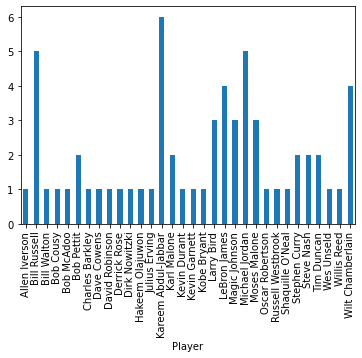

In [11]:
ganadores = df_data2.groupby("Player")["MVP"].sum()
ganadores2 = ganadores > 0
ganadores[ganadores2].plot(kind="bar")

Podemos observar como Kareem, Bill Russell, Michael Jordan, Wilt y LeBron son los maximos ganadores de este trofeo.

## Vistazo de las principales variables comunmente observadas

<AxesSubplot:xlabel='Player'>

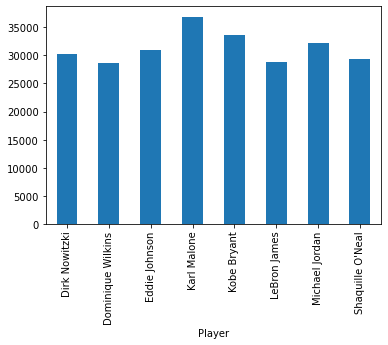

In [15]:
puntos = df_data3.groupby("Player")["PTS"].sum()
puntos2 = puntos > 28000
puntos[puntos2].plot(kind="bar")

<AxesSubplot:xlabel='Player'>

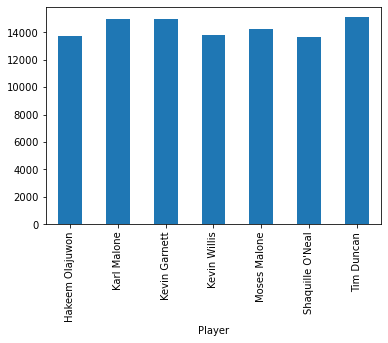

In [23]:
rebotes = df_data3.groupby("Player")["TRB"].sum()
rebotes2 = rebotes > 13500
rebotes[rebotes2].plot(kind="bar")

<AxesSubplot:xlabel='Player'>

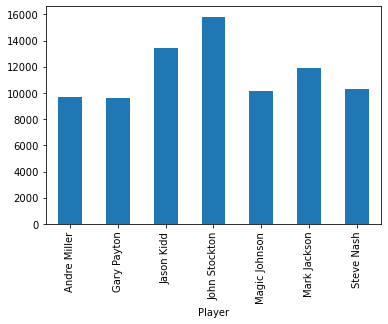

In [25]:
asistencias = df_data3.groupby("Player")["AST"].sum()
asisencias2 = asistencias > 9500
asistencias[asisencias2].plot(kind="bar")

Podemos observar como hay una correlacion entre puntos anotados, asistencias y rebotes y los ganadores de los MVPs. Este puede ser un buen proxy para los jugadores que podrian haber sido MVP en cada año, como a su vez un buen indicador para estimar el del año que viene

<AxesSubplot:xlabel='Age', ylabel='TOV'>

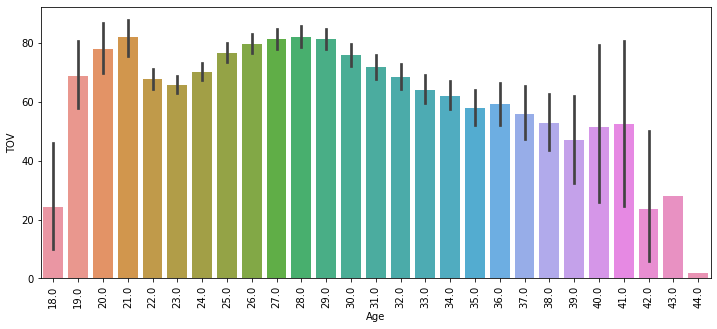

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(data=df_data3, x= "Age", y= "TOV" )

Este grafico nos muestra como la cantidad de Trunovers es alta en las edades bajas, disminuye a medida que el jugador madura y se vuelve mas experimentado, para subir un poco cuando ya entra en una edad alta, probablemente debido a la perdida de condiciones fisicas.

## Modelos

Comenzaremos a intentar correr algunos modelos para poder analizar de manera mas profunda cuales son las variables que realmente importan a la hora de decidir quien sera el MVP de la temporada.

#### Codigo para Seleccion de Features

In [5]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

!pip install mlxtend 
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

x2 = df_data3.drop("Player", axis=1)
x3 = x2.drop('Tm', axis=1)
x4 = x3.drop('Pos', axis=1)
x5 = x4.drop('Year', axis=1)
x = x5.drop('MVP', axis=1)
y = df_data3['MVP']


sfs.fit(x, y)
sfs.k_feature_names_  

('G', 'MP', 'PER', 'OWS', 'VORP', 'DRB', 'AST', 'STL', 'PF', 'PTS', 'FJMVP')

Las variables que me devolvio son las que tienen buen potencial para ser las mas ponderantes para decidir un MVP.

Al querer utilizar el codigo que me incluiste en la devolucion tengo un error asique no lo inclui. el codigo es este:

feature_names_selected = sfs.k_feature_names_
Crear una nueva matriz de características con las características seleccionadas
x_selected = x[feature_names_selected]

## Correremos un model de Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = x5.drop(['MVP'], axis=1)
y = x5['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Accuracy: 0.9979245935662401
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       0.25      0.10      0.14        10

    accuracy                           1.00      5782
   macro avg       0.62      0.55      0.57      5782
weighted avg       1.00      1.00      1.00      5782



In [7]:
importance_scores = rf.feature_importances_

feature_names = X.columns.tolist()

feature_importance_list = list(zip(feature_names, importance_scores))

feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_list_sorted:
    print(f"{feature}: {importance}")

PER: 0.12979765715207578
WS: 0.1190795008155198
VORP: 0.110705096536197
OBPM: 0.10926184944299963
OWS: 0.1000006779352533
FG: 0.06539375034605414
WS/48: 0.05796704442584422
FT: 0.05410044209788215
BPM: 0.04000248542330365
DWS: 0.02656833230974964
FTA: 0.026428689113117868
2PA: 0.026059783711465497
PTS: 0.02160891391542875
FGA: 0.017983762749488697
2P: 0.01633961691389965
TOV: 0.015323632624798644
MP: 0.014354163094990708
USG%: 0.010752823613291076
AST: 0.006794894489161518
FG%: 0.005596800388278009
eFG%: 0.005161391864302408
STL: 0.004872980123015551
PF: 0.0025014892576400594
FT%: 0.0015221817381852144
DRB: 0.0014839166894892886
TRB: 0.0012042225699673231
Age: 0.0011225950050342708
DBPM: 0.001059057147513706
TOV%: 0.000892066908736729
2P%: 0.0008759981595305737
Unnamed: 0: 0.0007262287256892987
AST%: 0.0006826647201131493
3PA: 0.0004422759820345702
BLK: 0.0004202582841510194
DRB%: 0.000386238973895181
BLK%: 0.00037617124963895644
ORB: 0.00036830786496711075
3PAr: 0.0003194821644397846


Habiendo utilizado el metodo de random forest, creamos una lista con los coeficientes de cada una de las variables asignadas por este modelo ordenada de mas importante a menos importante.

Intentaremos plasmar esto en una matriz de confusion.

C:\Users\Juani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


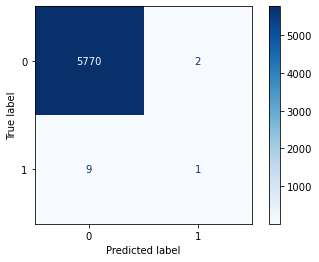

In [8]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues")
plt.show()

Si bien la precison del modelo lograda es de un 0.997, esto se da ya que predice muy bien quienes no son MVP, pero no logra ser preciso a la hora de determinar quien si lo sera, teniendo una efectividad del 20% en este rubro. A su vez pudimos observar que la mayor iportancia dentro de las variables usadas se la lleva WS, siendo "wins share" la variable que mas peso tiene al decidir quien sera o no el mvp de la temporada.

Es posible tambien que el modelo este un poco cargado de ruido todavia y le haga falta todavia una mayor limpieza de datos, ya que es mas que probable que se este underfiteando la probrabilidad de ser elegido MVP.


## Modelo de Arbol de Decision

C:\Users\Juani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


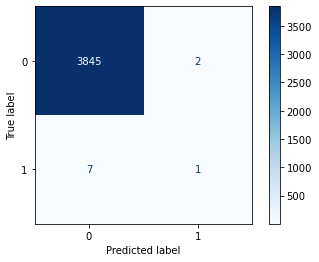

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X = x5.drop(['MVP'], axis=1)
y = x5['MVP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(class_weight="balanced")

tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues")
plt.show()

In [10]:
importance_scores = tree_clf.feature_importances_

feature_names = X.columns.tolist()

feature_importance_list = list(zip(feature_names, importance_scores))

feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_list_sorted:
    print(f"{feature}: {importance}")

PER: 0.9387562220398501
OWS: 0.030775878068619842
WS/48: 0.007850029705812977
PF: 0.005753853695012543
TOV: 0.004202313138291533
ORB: 0.002179431388154986
TOV%: 0.0014128628623044826
BLK%: 0.001164005486208991
OBPM: 0.0010321617581155985
FG%: 0.0008990168164431467
FTA: 0.0007712334356552037
Age: 0.0006447016448306625
DWS: 0.0005188248000516976
2P: 0.0005148208851630133
FT%: 0.00038920566927428177
2P%: 0.00038674071665460496
MP: 0.00038644050069267904
FGA: 0.0003862905237842141
FG: 0.0002597608366569966
Unnamed: 0: 0.0002590620930542094
TRB%: 0.00025804422903033005
STL%: 0.00025791060525191464
DRB: 0.00012975455504236154
PTS: 0.00012923123626146986
DRB%: 0.00012921448778485678
FTr: 0.00012919774256584709
FT: 0.00012916426189020922
3PAr: 0.00012914752643178716
USG%: 0.00012911406527280672
WS: 3.636522583629662e-05
AST%: 2.64418537980513e-16
2PA: 1.9358363898982707e-16
BLK: 9.669684408022456e-17
TRB: 1.5911873703592362e-17
G: 0.0
GS: 0.0
TS%: 0.0
ORB%: 0.0
DBPM: 0.0
BPM: 0.0
VORP: 0.0
3P:

Al usar el modelo de arbol de decision llegamos a conclusiones similares, por lo que podemos asumir que este tipo de modelos no seran de mucha ayuda para poder predecir con certeza quien puede ser el MVP de la siguiente teporada, si nos podemos quedar con que variables estos modelos consideran como importantes para poder compararlas con otros modelos en el futuro.

## Sugerencia de Vir

In [11]:
correlation_matrix = df_data3.corr()

mvp_correlations = correlation_matrix['MVP']

# Filtrar las variables con coeficiente de correlación mayor a 0.2
variables_interesantes = mvp_correlations[abs(mvp_correlations) > 0.2].index.tolist()

# Imprimir las variables seleccionadas
print(variables_interesantes)

['OWS', 'WS', 'VORP', 'MVP', 'FJMVP']


Vemos como mediante este metodo, observamos que la variables con mayor incidencia es la de victorias por aportes ofensivos y en segundo lugar la de WS, que es la que el resto de los modelos nos estaba indicando.

## Modelo de Regresion

In [12]:
import statsmodels.formula.api as smf

model2 = 'MVP~WS + DBPM + TOV + FG + BLK + PER + ORB + G + DWS + FJMVP + OWS'
lm2 = smf.ols(formula=model2, data=df_data3).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MVP   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     296.5
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:22:15   Log-Likelihood:                 33950.
No. Observations:               19271   AIC:                        -6.788e+04
Df Residuals:                   19259   BIC:                        -6.778e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0033      0.001      3.606      0.0

Al correr el modelo de regresion logramos ver como las variables que los modelos de clasificacio creian relevantes, para estos son variables muy poco significativas. Asi es como vemos que en este caso, la variables mas ponderante es la de FJMVP, es decir que quien sea elegido como mejor jugador en las finales de la NBA, tendra mejores chances de ser elegido como MVP de esa temporada.


## PREGUNTAS

Para comenzar, nos plateamos las preguntas mas generales, quienes fueron los MVPs, nos preguntamos que caracterisiticas comunes tienen entre si y por ultimo analizas especificamente cuales son las variables mas sofisticadas que estos individuos tienen en comun y los destacan por sobre el resto

## RESPUESTAS

Kareem, Bill Russell, Michael Jordan, Wilt y LeBron son los maximos ganadores del premio a mejor jugador.

Los puntos, asistencias y rebotes, parecerian indicar que hay algo alli para analizar en cuanto a su correlacion con ganar el trofeo de MVP.

Analizando mas profundamente, vemos que estas estaditicas infieren en las que enrealidad encontramos relevantes que son WS, FJMVP, VORP, entre otras.

Este es un buen ejemplo de porque si bien las teorias por conocimiento previo de uno, parezcan confirmarse en un primer vistazo, es muy importante investigar y analizar en profundidad todas las variables, para poder encontrar una respuesta que sea mucho mas fehaciente con la realidad.


## NUEVO ENFOQUE

Al haber agotado los metodos de clasificacion al alcance de mi conocimiento, intentaremos utulizar los insights que obtuvimos, a pesar de que su fiabilidad debido a las muestras disponibles sean bajas, para mover nuestro analisis a buscar aquellos jugadores que tuvieron la mayor probabilidad de ser MVP y lo fueron o no lo fueron.

Para ellos utilizaremos tambien un modelo de clasificacion que le asignara en base a un set de entrenamiento una probabilidad de ser MVP a cada uno de los jugadores.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


# Separar las características (X) y el objetivo (y)
X = x5.drop(['MVP'], axis=1)
y = x5['MVP']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

# Obtener las probabilidades de ser MVP para cada jugador en el conjunto de prueba
y_probs = rf.predict_proba(X_test)[:, 1]

# Crear un DataFrame con los nombres de los jugadores y sus probabilidades de ser MVP
results_df = pd.DataFrame({'Player': X_test.index, 'Probability_MVP': y_probs})

# Unir el DataFrame 'results_df' con el DataFrame original 'df_data3' usando el índice
merged_data = df_data3.merge(results_df, left_index=True, right_on='Player', how='left')

# Ordenar el DataFrame primero por 'MVP' en orden descendente y luego por 'Probability_MVP' en orden descendente
merged_data_sorted = merged_data.sort_values(by=['MVP', 'Probability_MVP'], ascending=[False, False])

# Calcular la media de la columna 'Probability_MVP'
mean_probability_mvp = merged_data_sorted['Probability_MVP'].mean()

# Reemplazar los valores NaN en 'Probability_MVP' con la media
merged_data_sorted['Probability_MVP'].fillna(mean_probability_mvp, inplace=True)

MD = merged_data_sorted.sort_values(by=['MVP', 'Probability_MVP', "Year"], ascending=[False, False, False])
MD2 = MD.drop(["Player", "Unnamed: 0"], axis=1)
MD100 = MD2.head(60)
print("Top 50 de jugadores con más probabilidades de ser MVP:")
print(MD100[["Year", 'Player_x', 'Probability_MVP', "MVP", "FJMVP", "WS", "PER", "FG"]])


Top 50 de jugadores con más probabilidades de ser MVP:
        Year             Player_x  Probability_MVP  MVP  FJMVP    WS   PER  \
3588.0  1987        Magic Johnson         0.520000    1      1  15.9  27.0   
3573.0  1990        Magic Johnson         0.400000    1      0  16.5  26.6   
1878.0  1998       Michael Jordan         0.190000    1      1  15.8  25.2   
177.0   1981        Julius Erving         0.170000    1      0  13.8  25.1   
3128.0  2016        Stephen Curry         0.140000    1      0  17.9  31.5   
4868.0  1983         Moses Malone         0.090000    1      1  15.1  25.1   
39.0    1980  Kareem Abdul-Jabbar         0.080000    1      0  14.8  25.3   
NaN     2017    Russell Westbrook         0.001832    1      0  13.1  30.6   
NaN     2015        Stephen Curry         0.001832    1      0  15.7  28.0   
NaN     2014         Kevin Durant         0.001832    1      0  19.2  29.8   
NaN     2013         LeBron James         0.001832    1      1  19.3  31.6   
NaN     2

## Conclusiones

logramos asignarle una probabilidad de ser el mejor jugador de la temporada a cada jugador de la liga. esto nos dara la posibilidad de asilar cada uno de los casos y ver quienes tuvieron mas chances y quienes terminaron llevandose el premio.

In [23]:
# Creo una máscara para seleccionar solo los datos del año 1987
mask_1987 = MD2['Year'] == 1987

# Aplico la máscara para filtrar los datos del año 1987
data_1987 = MD2.loc[mask_1987]

print("Top 50 de jugadores con más probabilidades de ser MVP en el año 1987:")
print(data_1987[["Year", 'Player_x', 'Probability_MVP', "MVP", "FJMVP", "WS", "PER", "FG"]])

Top 50 de jugadores con más probabilidades de ser MVP en el año 1987:
        Year             Player_x  Probability_MVP  MVP  FJMVP    WS   PER  \
3588.0  1987        Magic Johnson         0.520000    1      1  15.9  27.0   
2388.0  1987           Larry Bird         0.720000    0      0  15.2  26.4   
3984.0  1987       Michael Jordan         0.010000    0      0  16.9  29.8   
NaN     1987  Kareem Abdul-Jabbar         0.001832    0      0   7.5  17.9   
NaN     1987          Alvan Adams         0.001832    0      0   2.8  14.6   
...      ...                  ...              ...  ...    ...   ...   ...   
3456.0  1987       Michael Wilson         0.000000    0      0  -0.1   0.3   
2242.0  1987         Mike Woodson         0.000000    0      0   0.9  13.9   
2421.0  1987          Perry Young         0.000000    0      0  -0.1   3.0   
2930.0  1987          Perry Young         0.000000    0      0   0.0   3.8   
4146.0  1987          Perry Young         0.000000    0      0  -0.1   2

En el año 1987, encontramos una curiosidad. La mayor probabilidad de ganar el trofeo la tenia Larr bird, quien se habia llevado el trofeo el año anterior, pero lo consigue ganar el segundo con mayores probabilidades, Magic johnson. Y la curioso final es que el 3ro con mas chances es Kareem, quien tuvo mejores numeros en las estadisticas que el modelo considera mas ponderantes que los otros dos y asi y todo quedo 3ro.

In [24]:
mask_1990 = MD2['Year'] == 1990
data_1990 = MD2.loc[mask_1990]

print("Top 50 de jugadores con más probabilidades de ser MVP en el año 1990:")
print(data_1990[["Year", 'Player_x', 'Probability_MVP', "MVP", "FJMVP", "WS", "PER", "FG"]])

Top 50 de jugadores con más probabilidades de ser MVP en el año 1990:
        Year           Player_x  Probability_MVP  MVP  FJMVP    WS   PER  \
3573.0  1990      Magic Johnson         0.400000    1      0  16.5  26.6   
3695.0  1990         Larry Bird         0.010000    0      0   9.5  21.9   
1088.0  1990     David Robinson         0.010000    0      0  15.1  26.3   
4129.0  1990  Dominique Wilkins         0.010000    0      0  11.1  24.6   
NaN     1990      Michael Adams         0.001832    0      0   6.9  15.4   
...      ...                ...              ...  ...    ...   ...   ...   
879.0   1990    Reggie Williams         0.000000    0      0  -0.2   7.8   
659.0   1990       Kevin Willis         0.000000    0      0   4.7  15.7   
2103.0  1990           Joe Wolf         0.000000    0      0  -0.2   6.8   
3693.0  1990   Haywoode Workman         0.000000    0      0   0.1  26.1   
1386.0  1990       James Worthy         0.000000    0      0  10.6  19.8   

           FG  
3

En el 1990, vemos que el algoritmo logra predecir correctamente quien era el MVP, ya que el que tuvo mayor probabilidad fue el que realmente se llevo el premio por sobre el resto.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Creación del modelo SVM
modelo = SVC(C = 100, kernel = 'linear', random_state=42)
modelo.fit(X_train, y_train)

#Predicciones!
y_test_pred = modelo.predict(X_test)

###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

###Completar
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import classification_report
reporte=classification_report(y_test,y_test_pred)
print(reporte)


In [ ]:
from sklearn.svm import LinearSVC

# Entrena un modelo LinearSVC
modelo = LinearSVC()
modelo.fit(X_train, y_train)

coefficients = modelo.coef_.flatten()

feature_names = X.columns.tolist()

feature_importance_list = list(zip(feature_names, coefficients))

feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: abs(x[1]), reverse=True)

for feature, importance in feature_importance_list_sorted:
    print(f"{feature}: {importance}")

Probando con otro modelo, vemos que el ajuste de este no es muy bueno, no logra diferenciar bien ninguna variable como realmente significativa como si los otro modelos. 

In [22]:
mask_mvp = MD2["MVP"] == 1
data_mvp = MD2.loc[mask_mvp]
data_mvp.head(100)

,Year,Player_x,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,MVP,FJMVP,Player_y,Probability_MVP
3588.0,1987,Magic Johnson,PG,27.0,LAL,80.0,80.0,2904.0,27.0,0.602,...,977.0,138.0,36.0,300.0,168.0,1909.0,1,1,7928.0,0.520000
3573.0,1990,Magic Johnson,PG,30.0,LAL,79.0,79.0,2937.0,26.6,0.622,...,907.0,132.0,34.0,289.0,167.0,1765.0,1,0,9201.0,0.400000
1878.0,1998,Michael Jordan,SG,34.0,CHI,82.0,82.0,3181.0,25.2,0.533,...,283.0,141.0,45.0,185.0,151.0,2357.0,1,1,13112.0,0.190000
177.0,1981,Julius Erving,SF,30.0,PHI,82.0,0.0,2874.0,25.1,0.572,...,364.0,173.0,147.0,266.0,233.0,2014.0,1,0,5654.0,0.170000
3128.0,2016,Stephen Curry,PG,27.0,GSW,79.0,79.0,2700.0,31.5,0.669,...,527.0,169.0,15.0,262.0,161.0,2375.0,1,0,23073.0,0.140000
4868.0,1983,Moses Malone,C,27.0,PHI,78.0,78.0,2922.0,25.1,0.578,...,101.0,89.0,157.0,264.0,206.0,1908.0,1,1,6518.0,0.090000
39.0,1980,Kareem Abdul-Jabbar,C,32.0,LAL,82.0,0.0,3143.0,25.3,0.639,...,371.0,81.0,280.0,297.0,216.0,2034.0,1,0,5203.0,0.080000
NaN,2017,Russell Westbrook,PG,28.0,OKC,81.0,81.0,2802.0,30.6,0.554,...,840.0,133.0,31.0,438.0,190.0,2558.0,1,0,NaN,0.001832
NaN,2015,Stephen Curry,PG,26.0,GSW,80.0,80.0,2613.0,28.0,0.638,...,619.0,163.0,16.0,249.0,158.0,1900.0,1,0,NaN,0.001832
NaN,2014,Kevin Durant,SF,25.0,OKC,81.0,81.0,3122.0,29.8,0.635,...,445.0,103.0,59.0,285.0,174.0,2593.0,1,0,NaN,0.001832


In [34]:
condiciones = (
    (df_data3['TS%'] > 0.45) &
    (df_data3['GS'] > 70) &
    (df_data3['PER'] > 20) &
    (df_data3['PF'] > 100) &
    (df_data3['PTS'] > 1200)
)

# Crea la nueva variable dummy con ceros en todas las filas
df_data3['nueva_variable_dummy'] = 0

# Asigna 1 solo a las filas que cumplen con las condiciones
df_data3.loc[condiciones, 'nueva_variable_dummy'] = 1
df_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19271 entries, 4859 to 24129
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19271 non-null  int64  
 1   Year                  19271 non-null  int32  
 2   Player                19271 non-null  object 
 3   Pos                   19271 non-null  object 
 4   Age                   19271 non-null  float64
 5   Tm                    19271 non-null  object 
 6   G                     19271 non-null  float64
 7   GS                    19271 non-null  float64
 8   MP                    19271 non-null  float64
 9   PER                   19271 non-null  float64
 10  TS%                   19271 non-null  float64
 11  3PAr                  19271 non-null  float64
 12  FTr                   19271 non-null  float64
 13  ORB%                  19271 non-null  float64
 14  DRB%                  19271 non-null  float64
 15  TRB%            

In [41]:
x2 = df_data3.drop("Player", axis=1)
x3 = x2.drop('Tm', axis=1)
x4 = x3.drop('Pos', axis=1)
x5 = x4.drop('Year', axis=1)
x = x5.drop('MVP', axis=1)
y = df_data3['MVP']

x5.head()

,Unnamed: 0,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,FJMVP,nueva_variable_dummy
4859,5382,31.0,80.0,0.0,3157.0,25.5,0.612,0.0,0.352,7.6,...,1025.0,431.0,76.0,316.0,282.0,230.0,1903.0,0,0,0
4860,5383,24.0,70.0,0.0,1219.0,13.6,0.550,0.0,0.275,6.5,...,216.0,79.0,39.0,13.0,32.0,133.0,422.0,0,0,0
4861,5384,24.0,77.0,0.0,2364.0,20.4,0.570,0.0,0.269,10.5,...,705.0,360.0,110.0,63.0,279.0,246.0,1369.0,0,0,0
4862,5385,31.0,31.0,0.0,413.0,8.7,0.416,0.0,0.190,3.6,...,46.0,44.0,21.0,6.0,30.0,52.0,157.0,0,0,0
4863,5386,23.0,21.0,0.0,224.0,3.0,0.353,0.0,0.364,8.3,...,45.0,15.0,4.0,5.0,22.0,42.0,63.0,0,0,0


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = x5.drop(['MVP'], axis=1)
y = x5['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Accuracy: 0.9979245935662401
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       0.25      0.10      0.14        10

    accuracy                           1.00      5782
   macro avg       0.62      0.55      0.57      5782
weighted avg       1.00      1.00      1.00      5782



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = x5.drop(['MVP'], axis=1)
y = x5['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experimento con diferentes valores de n_estimators para ajustar la complejidad del modelo
rf = RandomForestClassifier(n_estimators=2000, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

Accuracy: 0.9980975441023867
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       0.33      0.10      0.15        10

    accuracy                           1.00      5782
   macro avg       0.67      0.55      0.58      5782
weighted avg       1.00      1.00      1.00      5782



In [48]:
importance_scores = rf.feature_importances_

feature_names = X.columns.tolist()

feature_importance_list = list(zip(feature_names, importance_scores))

feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance_list_sorted:
    print(f"{feature}: {importance}")

PER: 0.13844284603726584
VORP: 0.11976075443900445
WS: 0.10675979599012804
WS/48: 0.09570975981867688
OWS: 0.0900194863443314
OBPM: 0.07371145699062819
BPM: 0.06746762326570521
PTS: 0.04791294741479436
FT: 0.03982263615632209
FTA: 0.029484797160109207
FG: 0.029392496795853373
TOV: 0.025269537800968307
DWS: 0.022987006676589053
FGA: 0.020077308234567944
nueva_variable_dummy: 0.016373191016066834
2P: 0.014910136927785263
USG%: 0.011338228165312575
MP: 0.010719108167842672
2PA: 0.010445608146115958
DRB: 0.0035810465695779573
TRB: 0.002901611482408764
TS%: 0.0028242640848731037
AST: 0.0027634487356594088
PF: 0.0022957747019765697
GS: 0.002025181296112073
AST%: 0.001547791417946962
G: 0.001391919250076599
DBPM: 0.0009417865470637093
STL: 0.000881533960967191
FG%: 0.0008621903639585846
2P%: 0.0008072580799825042
Age: 0.0007030777679363993
BLK: 0.0006965962443450907
FT%: 0.0005353347883825059
Unnamed: 0: 0.0004890319406471124
ORB: 0.0004835111521635372
BLK%: 0.0004249816023700382
FTr: 0.00042

Vemos que logramos generar una variable con una ponderacion importante para el modelo de clasificacion. Asi y todo los scores del modelo a pesar mover y experimentar con diferentes "N_estimators" no mueven mucho los resultados.

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Dividir tus datos en conjuntos de entrenamiento y prueba
X = x5.drop(['MVP'], axis=1)
y = x5['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experimentar con diferentes valores de n_estimators para ajustar la complejidad del modelo
rf = RandomForestClassifier(n_estimators=2000, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# Realizar validación cruzada con RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring="accuracy")
print(f'Scores for each fold are: {scores}')
print(f'Average score: {"{:.2f}".format(scores.mean())}')


Accuracy: 0.9980975441023867
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       0.33      0.10      0.15        10

    accuracy                           1.00      5782
   macro avg       0.67      0.55      0.58      5782
weighted avg       1.00      1.00      1.00      5782

Scores for each fold are: [0.99792477 0.99714582 0.99818371 0.99792423 0.99792423]
Average score: 1.00
